In [2]:
import jax
from jax import numpy as jnp
from jax.config import config; config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import sys; sys.path.insert(1, '..')

import dill as pickle

from algs.train import TracePlotter
from env.gridworld import gridplot

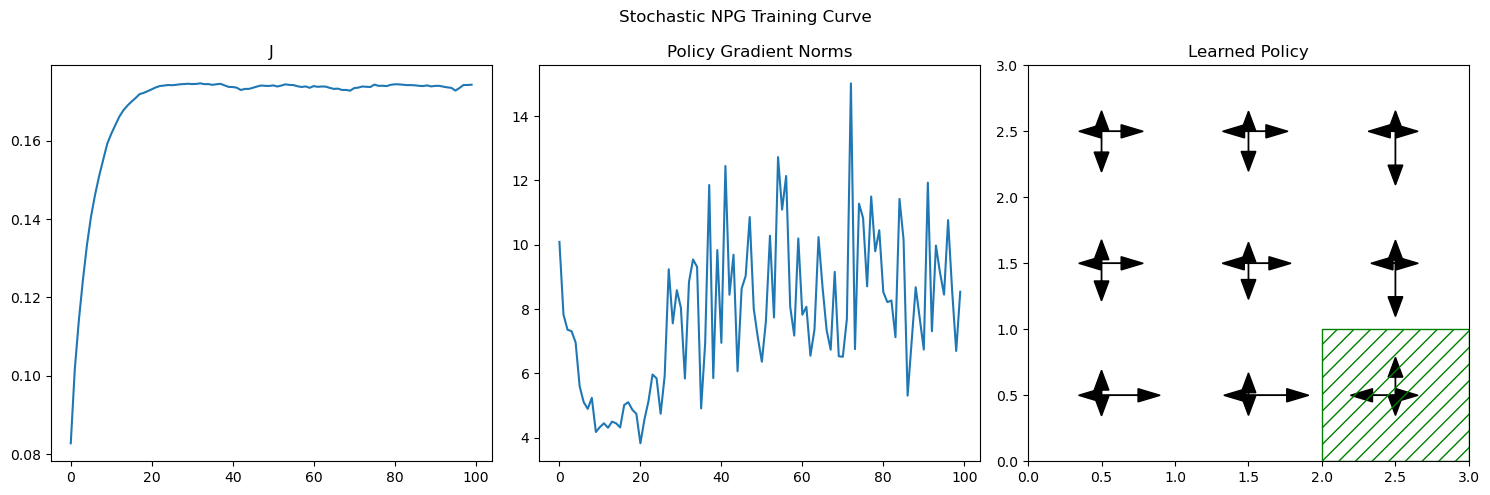

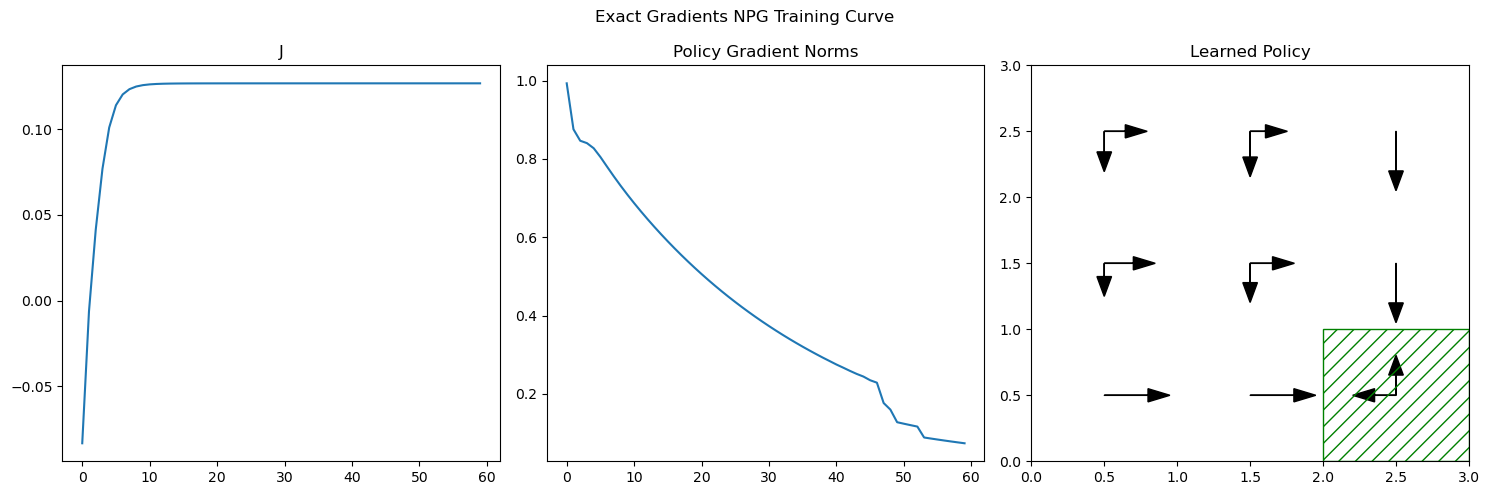

In [20]:
def plotPgTrace(data_path:str,title:str,scale:int=5):
    trainData = pickle.load( open( data_path, "rb" ) )
    
    fig, ax = plt.subplots(1,3,figsize=(3*scale,scale))
    TracePlotter.plotScalar(ax[0],'J',trainData.trace)
    TracePlotter.plotGradNorms(ax[1],'policy',trainData.trace,'Policy Gradient Norms')
    gridplot(trainData.trainer.mdp,ax[2],stochastic_policy=trainData.trainer.pFun(trainData.optimizer['policy']),goals=trainData.trainer.mdp.goals)
    ax[2].set_title('Learned Policy')
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()
    
plotPgTrace(    data_path="logs/example_stoch_npg.pkl",
                title="Stochastic NPG Training Curve")
plotPgTrace(    data_path="logs/example_exact_npg.pkl",
                title="Exact NPG Training Curve")

TypeError: TracePlotter.scalarPlotArray() got an unexpected keyword argument 'fig_ax'

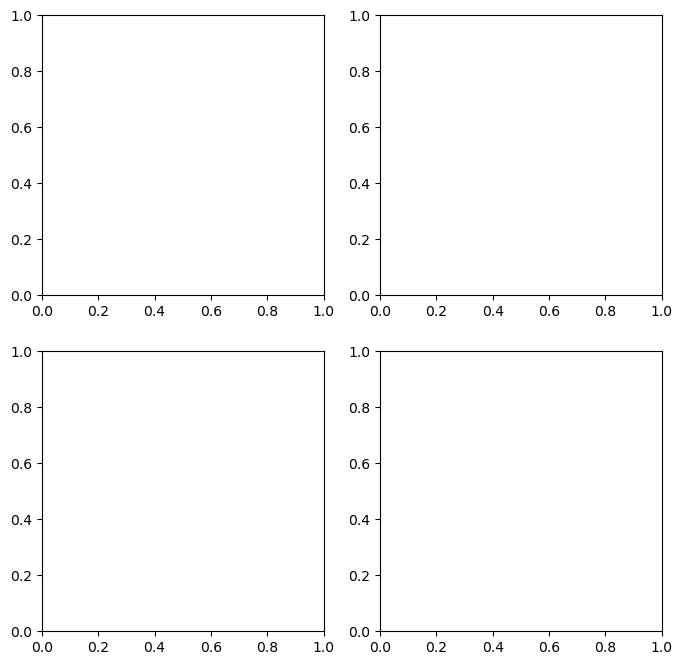

In [39]:
scale = 8
trainData = pickle.load( open( "logs/mc_irL.pkl", "rb" ) )
scalar_plots = [['L','PRE'],['policy','reward']]
titles = [['Lagrangian Value','TV distance to expert policy'],['Policy grad. norms','Reward grad. norms']]

fig, ax = plt.subplots(2,2,figsize=(scale,scale))
fig,ax = TracePlotter.scalarPlotArray(scalar_plots,
                                 trainData.trainer,
                                 trainData.optimizer,
                                 trainData.trace,(scale,scale),
                                 titles,fig_ax=(fig,ax))

ax[0,0].hlines([0],0,200,colors='r')
ax[0,1].hlines([0],0,200,colors='r')
# _ = TracePlotter.gworldIRLPlot(trainData.trainer,
#                                trainData.optimizer,
#                                trainData.trace,fsize=(6,4))